# Twitter Retweet & Mention networks

Uses the Twitter API via Tweepy to run a search for tweets containing a hashtag, then produces retweet and mention networks. 
Requires saved keys to run correctly.

In [9]:
import tweepy
import networkx as nx
import matplotlib.pyplot as plt
import saveVars as sv

In [10]:
#consumer_token = 'PnBcDYkIeXNS9OfWoR68AXtk4' # These are nonworking examples
#consumer_secret = 'I2mzpmv2NLehHAyCBWYm2rZO9DjfJNRd50CfDkedLInU713osO'
consumer_token = sv.consumer_token
consumer_secret = sv.consumer_secret
# generate URL to grab the verifier pin
auth = tweepy.OAuthHandler(consumer_token, consumer_secret)
redirect_url = auth.get_authorization_url()
print(redirect_url)

https://api.twitter.com/oauth/authorize?oauth_token=ejbkOQAAAAAA9HnYAAABZ7l_ga0


In [5]:
verifier = '1652912' # use the generated token
auth.get_access_token(verifier);
api = tweepy.API(auth)

In [6]:
# Search Results
cursor = tweepy.Cursor(api.search, q='#ai', count=100)
search_results = list(cursor.items(2000))
retweets = []
for tweet in search_results:
    # if retweeted_status in tweet
    try:
        tweet.retweeted_status
    except AttributeError:
        pass
    else:
        retweets.append(tweet)
        
print(len(retweets))

1463


In [34]:
# Build a retweet graph
G2 = nx.DiGraph()
for retweet in retweets:
    retweeting_user = retweet.user
    
    retweeted_status = retweet.retweeted_status
    retweeted_user = retweeted_status.user
    
    G2.add_edge(retweeted_user.screen_name, retweeting_user.screen_name)

# remove singletons and self loops
G2.remove_nodes_from(nx.isolates(G2))
G2.remove_edges_from(G2.selfloop_edges())

print('Nodes:', len(G2.nodes()))
print('Edges:', len(G2.edges()))

# Density and Sparcity
#print(len(G.edges())
print('Density:', nx.density(G2))



Nodes: 1220
Edges: 1262
Density: 0.0008485859142807192


In [20]:
inDegDict = dict(G2.in_degree(nbunch=None, weight=None))
mxIn = max(inDegDict, key=inDegDict.get)
print('In degree:', mxIn, inDegDict[mxIn])

outDegDict = dict(G2.out_degree(nbunch=None, weight=None))
mxOut = max(outDegDict, key=outDegDict.get)
print('Out degree:', mxOut, outDegDict[mxOut])

In degree: chidambara09 64
Out degree: MikeQuindazzi 45


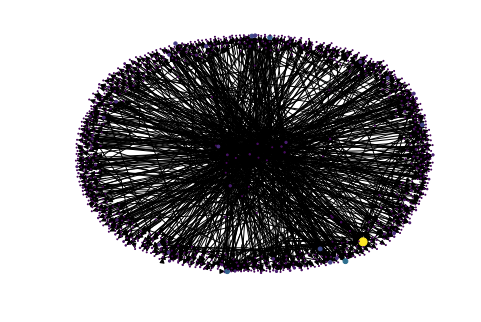

In [25]:
# Draw by indegree
inVals = list(inDegDict.values())
nx.draw(G2, node_color=inVals, node_size=inVals) 

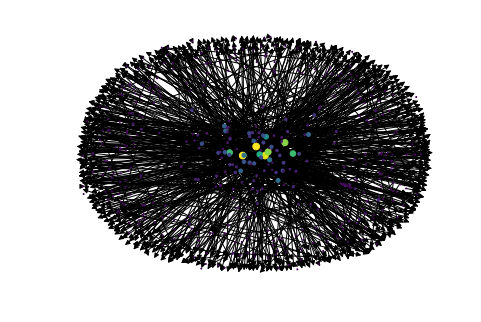

In [26]:
# Draw by outdegree
outVals = list(outDegDict.values())
nx.draw(G2, node_color=outVals, node_size=outVals)

In [29]:
# What proportion of the nodes in this network are sinks 
# (i.e. nodes with zero out-degree)? 
countOut0 = [1 for v in outVals if v == 0]
print(sum(countOut0)/len(G2.nodes()))

0.6237704918032787


In [31]:
# What proportion of the nodes in this network are sources 
# (i.e. nodes with zero in-degree)? 
countIn0 = [1 for v in inVals if v == 0]
print(sum(countIn0)/len(G2.nodes()))


0.3360655737704918


In [33]:
# What proportion of the nodes in this network are in its largest weakly-connected component?
bigCC = max(nx.weakly_connected_components(G2), key=len)
print(len(bigCC)/len(G2.nodes()))

0.5172131147540984


# Mention network

Here we want to produce a *directed* graph of users *mentioning* each other in their tweets. (from the *tweeting* user to the *mentioned* user)

In [49]:
# Search Results
cursor = tweepy.Cursor(api.search, q='#academictwitter', count=100)
search_results = list(cursor.items(2000))

print(len(search_results))



2000


In [50]:
M = nx.DiGraph()
for tweet in search_results:
    tweet_user = tweet.user
    #print(tweet_user)
    user_mentions = tweet.entities['user_mentions']

    for mention in user_mentions:
        M.add_edge(tweet_user._json['screen_name'], mention['screen_name'])
        
# remove singletons and self loops
M.remove_nodes_from(nx.isolates(M))
M.remove_edges_from(M.selfloop_edges())

print('Nodes:', len(M.nodes()))
print('Edges:', len(M.edges()))

# Density and Sparcity
#print(len(G.edges())
print('Density:', nx.density(M))

Nodes: 1602
Edges: 1623
Density: 0.0006327973855291754


In [52]:
inDegDict2 = dict(M.in_degree(nbunch=None, weight=None))
mxIn2 = max(inDegDict2, key=inDegDict2.get)
print('In degree:', mxIn2, inDegDict2[mxIn2])

outDegDict2 = dict(M.out_degree(nbunch=None, weight=None))
mxOut2 = max(outDegDict2, key=outDegDict2.get)
print('Out degree:', mxOut2, outDegDict2[mxOut2])

In degree: leslie_bern 293
Out degree: AcademicChatter 95


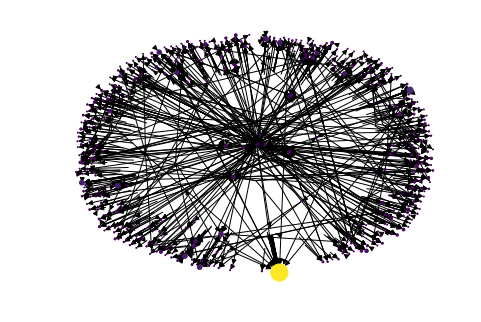

In [54]:
# Draw by indegree
inVals2 = list(inDegDict2.values())
nx.draw(M, node_color=inVals2, node_size=inVals2) 

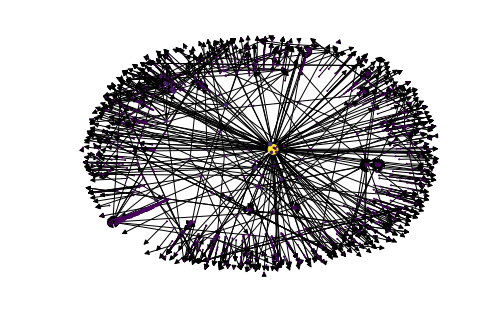

In [55]:
# Draw by outdegree
outVals2 = list(outDegDict2.values())
nx.draw(M, node_color=outVals2, node_size=outVals2)

In [57]:
# What proportion of the nodes in this network are sinks 
# (i.e. nodes with zero out-degree)? 
countOut02 = [1 for v in outVals2 if v == 0]
print(sum(countOut02)/len(M.nodes()))

0.24344569288389514


In [58]:
# What proportion of the nodes in this network are sources 
# (i.e. nodes with zero in-degree)? 
countIn02 = [1 for v in inVals2 if v == 0]
print(sum(countIn02)/len(M.nodes()))

0.7066167290886392


In [59]:
# What proportion of the nodes in this network are in its largest weakly-connected component?
bigCC2 = max(nx.weakly_connected_components(M), key=len)
print(len(bigCC2)/len(M.nodes()))

0.48314606741573035
